In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load dataset
df = sns.load_dataset('penguins')
print("Initial Data Shape:", df.shape)

Initial Data Shape: (344, 7)


In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [8]:
# 2. Preprocess the dataset
# Drop rows with missing values
df.dropna(inplace=True)


In [9]:
# Encode categorical target variable
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # target: species (0, 1, 2)


In [10]:
# Encode other categorical columns if needed
df['sex'] = le.fit_transform(df['sex'])
df['island'] = le.fit_transform(df['island'])


In [11]:
# Features and target
X = df.drop('species', axis=1)
y = df['species']


In [12]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# 3. Detect and remove outliers using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(X_scaled))
threshold = 3
no_outliers = (z_scores < threshold).all(axis=1)
X_clean = X_scaled[no_outliers]
y_clean = y[no_outliers]
print("After Outlier Removal:", X_clean.shape)

After Outlier Removal: (333, 6)


In [14]:
# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [15]:
# 5. Train SVM Classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [16]:
# 6. Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

      Biscoe       1.00      1.00      1.00        31
       Dream       1.00      1.00      1.00        13
   Torgersen       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



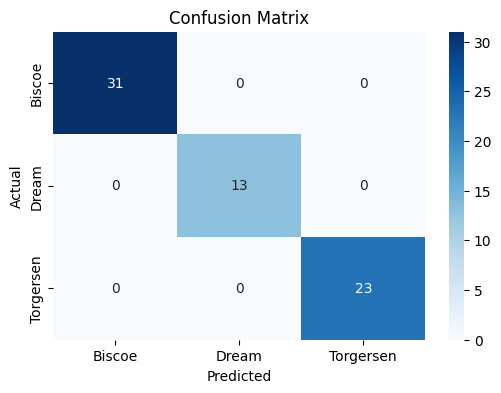

In [17]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
